['a_1', 'a_2', 'a_3', 'b_1', 'b_2', 'b_3', 'c_1', 'c_2', 'c_3', 'd_1', 'd_2', 'd_3']


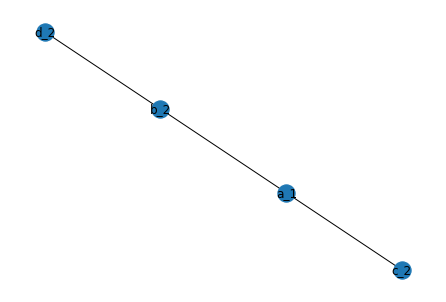

In [142]:
import networkx as nx
import pandas as pd
conflict_matrix = {}
df = pd.read_csv("/home/arms04/autonomous_driving_stack/Intelligent_Intersection_management/Four_way/conflict_matrix_4way_compliment.csv")
for i in df.columns:
    conflict_matrix[i]=[j for j in df[i] if j!= '0' or j!= 0]

G = nx.Graph()
G.add_nodes_from(df.columns)
print(G.nodes)
for i in df.columns:
    for j in df[i]:
        if j != "0":
            G.add_edge(i,j)
G.subgraph(['a_1', 'b_2','c_2', 'd_2'])
G1 = G.subgraph(['a_1', 'b_2','c_2', 'd_2'])
nx.draw(G1,with_labels=True)


In [2]:
import numpy as np
a = np.random.poisson(1.15,size=(1000))

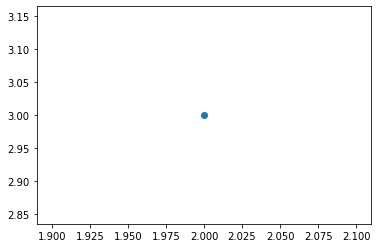

In [3]:
import matplotlib.pyplot as plt

plt.plot(2,3,'o')
plt.show()

In [30]:
# Pattern Recognition

import os
import sys
from math import sqrt
import numpy as np
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt

def intersection_manger(input_vehs,G: nx.graph):
    """THE ACTUAL ALGORITHM"""
    # incoming = {}
    # for i in input_vehs:
    #     incoming[i.split(".")[1]] = i.split(".")[0]
    # # input_vehs= [".".join([i.split(".")[1],i.split(".")[0]]) for i in input_vehs]
    # # input_vehs = sorted(input_vehs)
    # # input_vehs = [".".join([i.split(".")[1],i.split(".")[0]]) for i in input_vehs]
    # input = incoming.keys()
    output_list = input_vehs
    Gs = G.subgraph(input_vehs)
    # nx.draw(Gs,with_labels=True)
    # output_list = sorted(list(nx.find_cliques(Gs)),key=len,reverse=True)
    # output_list = sorted(sorted(list(nx.find_cliques(Gs)),key=len,reverse=True),key=lambda clique: sorted(clique,key=lambda man: man.split("_")[0]))
    # for i in range(len(output_list)):
    #     output_list[i] = sorted(output_list[i])
    output_list = sorted(sorted(list(nx.find_cliques(Gs)),key=lambda clique: sorted(clique,key=lambda man: man.split("_")[0])),key=len,reverse=True)    
    return output_list[0], input_vehs

conflict_matrix = {}
df = pd.read_csv("/home/arms04/autonomous_driving_stack/Intelligent_Intersection_management/Four_way/conflict_matrix_4way_compliment.csv")
for i in df.columns:
    conflict_matrix[i]=[j for j in df[i] if j!= '0' or j!= 0]

# creating a big graph out of conflict matrix
G = nx.Graph()
G.add_nodes_from(df.columns)
# print(G.nodes)
for i in df.columns:
    for j in df[i]:
        if j != "0":
            G.add_edge(i,j)
print(df.columns)
a_cases = {1:[],2:[],3:[]}
b_cases = {1:[],2:[],3:[]}
c_cases = {1:[],2:[],3:[]}
d_cases = {1:[],2:[],3:[]}
for i in [1,2,3]:
    for j in [1,2,3]:
        for k in [1,2,3]:
            for l in [1,2,3]:
                # i,j,k,l = 2,1,1,2
                out,inn = intersection_manger([f'a_{i}',f'b_{j}',f'c_{k}',f'd_{l}'],G)
                print(out,'out/inn',inn)
    #             break
    #         break
    #     break
    # break
                # # print(out)
                out_binary = []
                
                for n,o in zip(['a','b','c','d'],[i,j,k,l]):
                    if f'{n}_{o}' in out:
                        out_binary.append(f'{n}_{o}')
                    else:
                        out_binary.append(0)
                a_cases[i].append([inn,out_binary])
                # a_cases['Maneuvers'].append(inn)
                b_cases[j].append([inn,out_binary])
                # b_cases['Maneuvers'].append(inn)
                c_cases[k].append([inn,out_binary])
                # c_cases['Maneuvers'].append(inn)
                d_cases[l].append([inn,out_binary])
                # d_cases['Maneuvers'].append(inn)


# print(out)



Index(['a_1', 'a_2', 'a_3', 'b_1', 'b_2', 'b_3', 'c_1', 'c_2', 'c_3', 'd_1',
       'd_2', 'd_3'],
      dtype='object')
['c_1', 'b_1', 'a_1', 'd_1'] out/inn ['a_1', 'b_1', 'c_1', 'd_1']
['c_1', 'b_1', 'a_1'] out/inn ['a_1', 'b_1', 'c_1', 'd_2']
['c_1', 'a_1', 'b_1'] out/inn ['a_1', 'b_1', 'c_1', 'd_3']
['b_1', 'a_1', 'c_2'] out/inn ['a_1', 'b_1', 'c_2', 'd_1']
['b_1', 'a_1', 'c_2'] out/inn ['a_1', 'b_1', 'c_2', 'd_2']
['a_1', 'c_2', 'b_1'] out/inn ['a_1', 'b_1', 'c_2', 'd_3']
['b_1', 'd_1', 'a_1'] out/inn ['a_1', 'b_1', 'c_3', 'd_1']
['b_1', 'a_1'] out/inn ['a_1', 'b_1', 'c_3', 'd_2']
['b_1', 'a_1'] out/inn ['a_1', 'b_1', 'c_3', 'd_3']
['a_1', 'd_1', 'b_2'] out/inn ['a_1', 'b_2', 'c_1', 'd_1']
['b_2', 'a_1'] out/inn ['a_1', 'b_2', 'c_1', 'd_2']
['a_1', 'c_1', 'd_3'] out/inn ['a_1', 'b_2', 'c_1', 'd_3']
['a_1', 'b_2', 'd_1'] out/inn ['a_1', 'b_2', 'c_2', 'd_1']
['a_1', 'b_2'] out/inn ['a_1', 'b_2', 'c_2', 'd_2']
['a_1', 'b_2'] out/inn ['a_1', 'b_2', 'c_2', 'd_3']
['d_1', 'b_2', 'a_1'] 

In [7]:
for q in range(3):
    a = np.array(a_cases[q+1])
    print(len(a))
    b = np.array(b_cases[q+1])
    print(len(b))
    c = np.array(c_cases[q+1])
    print(len(c))
    d = np.array(d_cases[q+1])
    print(len(d))
    print("-------------------")

27
27
27
27
-------------------
27
27
27
27
-------------------
27
27
27
27
-------------------


/tmp/ipykernel_188304/813383267.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array(a_cases[q+1])
/tmp/ipykernel_188304/813383267.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(b_cases[q+1])
/tmp/ipykernel_188304/813383267.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c_cases[q+1])
/

In [31]:
cases = pd.DataFrame(a_cases)
# print(len(a_cases['Maneuvers']))

In [32]:
cases.to_csv('a_const.csv')